In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.6)

import functions

def access(seq, utr):
    new = functions.Optimiser(seq=seq, utr=utr)
    return new.accessibility(new_seq=seq)


# def response(x, inflection1=17.9896340, inflection2=17,\
#              slope1=-0.8, slope2=-0.5, max_sel=1.61155914, minsel_upper=0.5,):
#     '''
#     https://github.com/duplisea/dublogistic
#     x = x
#     omega = maximum/minimum selectivity
#     alpha = slope
#     beta = point of inflection
#     '''
#     minsel_upper= 1-minsel_upper
#     logistic1= max_sel/(1+np.exp(-slope1*(x-inflection1)))
#     logistic2= 1-minsel_upper/(1+np.exp(-slope2*(x-inflection2)))
#     sel= logistic1*logistic2
#     return sel


from lmfit.model import load_modelresult
model = load_modelresult('tisigner.model')

In [7]:
model

In [2]:
utr = 'AGGGGAATTGTGAGCGGATAACAATTCCCCTCTAGAAATAATTTTGTTTAACTTTAAGAAGGAGATATACC'
native = 'ATGAGTAAAGGAGAAGAACTTTTCACTGGAGTTGTCCCAATTCTTGTTGAATTAGATGGTGATGTTAATGGGCACAAATTTTCTGTCAGTGGAGAGGGTGAAGGTGATGCAACATACGGAAAACTTACCCTTAAATTTATTTGCACTACTGGAAAACTACCTGTTCCATGGCCAACACTTGTCACTACTTTCTCTTATGGTGTTCAATGCTTTTCAAGATACCCAGATCATATGAAACGGCATGACTTTTTCAAGAGTGCCATGCCCGAAGGTTATGTACAGGAAAGAACTATATTTTTCAAAGATGACGGGAACTACAAGACACGTGCTGAAGTCAAGTTTGAAGGTGATACCCTTGTTAATAGAATCGAGTTAAAAGGTATTGATTTTAAAGAAGATGGAAACATTCTTGGACACAAATTGGAATACAACTATAACTCACACAATGTATACATCATGGCAGACAAACAAAAGAATGGAATCAAAGTTAACTTCAAAATTAGACACAACATTGAAGATGGAAGCGTTCAACTAGCAGACCATTATCAACAAAATACTCCAATTGGAGATGGCCCTGTCCTTTTACCAGACAACCATTACCTGTCCACACAATCTGCCCTTTCGAAAGATCCCAACGAAAAGAGAGATCACATGGTCCTTCTTGAGTTTGTAACAGCTGCTGGGATTACACATGGCATGGATGAACTATACAAATAG'

In [8]:
gfp = pd.read_excel('Sequences optimized by TIsigner.xlsx', sheet_name='GFP')
gfp = gfp[~gfp.Index.isna()].reset_index(drop=True)
gfp = gfp[:16]
gfp['Opening Energy'] = gfp['First 30 nt'].apply(lambda x: access(x+native[30:], utr))
gfp['Opening Energy'] = gfp['Opening Energy'].round(2)
gfp['Expression Score'] = model.eval(x=gfp['Opening Energy'])
gfp = gfp[['Type', 'First 30 nt', 'Opening Energy', 'Expression Score']].copy()
gfp['Type'] = ['Native'] + ['Optimised']*15
gfp

,Type,First 30 nt,Opening Energy,Expression Score
0,Native,ATGAGTAAAGGAGAAGAACTTTTCACTGGA,11.68,0.852978
1,Optimised,ATGTCGAAGGGTGAAGAACTCTTCACTGGT,21.68,0.076465
2,Optimised,ATGAGTAAAGGGGAGGAACTCTTTACCGGG,20.37,0.192556
3,Optimised,ATGTCGAAGGGCGAAGAACTCTTCACTGGT,18.80,0.473392
4,Optimised,ATGTCTAAGGGTGAGGAGCTCTTCACGGGA,14.35,0.924696
5,Optimised,ATGTCGAAAGGGGAAGAACTGTTCACCGGC,14.23,0.921572
6,Optimised,ATGTCTAAAGGAGAAGAGCTTTTCACTGGG,13.77,0.908393
7,Optimised,ATGAGTAAGGGTGAGGAATTATTCACGGGC,12.84,0.880951
8,Optimised,ATGAGTAAAGGGGAAGAACTGTTCACTGGC,12.25,0.865578
9,Optimised,ATGTCTAAGGGTGAGGAGCTCTTCACAGGA,12.08,0.861581


In [9]:
gfp1 = pd.read_excel('Sequences optimized by TIsigner.xlsx', sheet_name='GFP_new')
# gfp1 = gfp1[gfp1['Remarks'].isna()]

gfp1['Opening Energy'] = gfp1['First 30 nt'].apply(lambda x: access(x+native[30:], utr))
gfp1['Opening Energy'] = gfp1['Opening Energy'].round(2)
gfp1['Expression Score'] = model.eval(x=gfp1['Opening Energy'])
gfp1['Expression Score'] = gfp1['Expression Score'].round(2)

gfp1 = gfp1[['Type', 'First 30 nt', 'Opening Energy', 'Expression Score']].copy()
gfp1['Type'] = 'Optimised'
gfp1

,Type,First 30 nt,Opening Energy,Expression Score
0,Optimised,ATGAGTAAAGGGGAAGAACTCTTTACCGGG,20.37,0.19
1,Optimised,ATGTCGAAAGGTGAGGAACTATTCACTGGT,16.31,0.90
2,Optimised,ATGTCGAAGGGTGAAGAACTGTTCACTGGT,18.79,0.48
3,Optimised,ATGTCGAAGGGTGAAGAACTTTTCACTGGG,17.84,0.68
4,Optimised,ATGTCCAAAGGGGAGGAACTCTTTACGGGC,16.86,0.85
5,Optimised,ATGTCCAAAGGTGAAGAGCTTTTCACCGGG,15.80,0.93
6,Optimised,ATGTCGAAAGGTGAAGAGCTGTTCACCGGT,15.66,0.93
7,Optimised,ATGTCGAAAGGTGAGGAACTGTTCACTGGG,15.19,0.94
8,Optimised,ATGAGTAAGGGGGAGGAGCTCTTCACCGGA,14.92,0.94
9,Optimised,ATGAGTAAAGGGGAAGAGCTTTTCACCGGG,13.88,0.91


In [10]:
gfp2 = pd.read_excel('Sequences optimized by TIsigner.xlsx', sheet_name='GFP_fixed')
# gfp2 = gfp2[gfp2['Remarks'].isna()]

gfp2['Opening Energy'] = gfp2['First 30 nt'].apply(lambda x: access(x+native[30:], utr))
gfp2['Opening Energy'] = gfp2['Opening Energy'].round(2)
gfp2['Expression Score'] = model.eval(x=gfp2['Opening Energy'])
gfp2['Expression Score'] = gfp2['Expression Score'].round(2)

gfp2 = gfp2[['Type', 'First 30 nt', 'Opening Energy', 'Expression Score']].copy()
gfp2['Type'] = 'Optimised'
gfp2

,Type,First 30 nt,Opening Energy,Expression Score
0,Optimised,ATGAGTAAAGGGGAGGAACTCTTTACTGGT,21.17,0.11
1,Optimised,ATGTCGAAAGGTGAAGAACTTTTCACTGGT,19.59,0.31
2,Optimised,ATGAGCAAGGGAGAAGAGCTGTTCACTGGC,14.69,0.93
3,Optimised,ATGAGTAAGGGTGAGGAGTTATTCACGGGC,13.04,0.89
4,Optimised,ATGTCTAAAGGAGAAGAACTCTTCACAGGG,12.52,0.87
5,Optimised,ATGTCCAAAGGAGAAGAACTATTCACCGGA,10.86,0.84
6,Optimised,ATGAGCAAAGGAGAAGAACTATTCACGGGA,8.45,0.82
7,Optimised,ATGTCGAAGGGAGAAGAATTATTTACGGGA,8.02,0.81


In [11]:
gfp.shape, gfp1.shape, gfp2.shape

((16, 4), (25, 4), (8, 4))

In [15]:
all_gfp = pd.concat([gfp, gfp1, gfp2]).reset_index(drop=True)
all_gfp['Expression Score'] = 100 * all_gfp['Expression Score']
all_gfp = all_gfp.round(2)
all_gfp

,Type,First 30 nt,Opening Energy,Expression Score
0,Native,ATGAGTAAAGGAGAAGAACTTTTCACTGGA,11.68,85.30
1,Optimised,ATGTCGAAGGGTGAAGAACTCTTCACTGGT,21.68,7.65
2,Optimised,ATGAGTAAAGGGGAGGAACTCTTTACCGGG,20.37,19.26
3,Optimised,ATGTCGAAGGGCGAAGAACTCTTCACTGGT,18.80,47.34
4,Optimised,ATGTCTAAGGGTGAGGAGCTCTTCACGGGA,14.35,92.47
5,Optimised,ATGTCGAAAGGGGAAGAACTGTTCACCGGC,14.23,92.16
6,Optimised,ATGTCTAAAGGAGAAGAGCTTTTCACTGGG,13.77,90.84
7,Optimised,ATGAGTAAGGGTGAGGAATTATTCACGGGC,12.84,88.10
8,Optimised,ATGAGTAAAGGGGAAGAACTGTTCACTGGC,12.25,86.56
9,Optimised,ATGTCTAAGGGTGAGGAGCTCTTCACAGGA,12.08,86.16


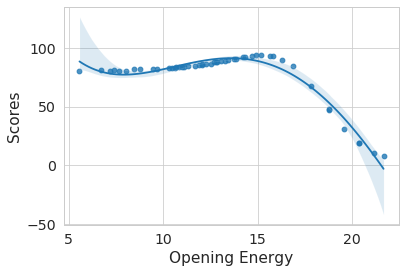

In [13]:
ax = sns.regplot(all_gfp['Opening Energy'], all_gfp['Expression Score'], order=4)
ax.set_ylabel('Scores');

In [16]:
all_gfp.columns

Index(['Type', 'First 30 nt', 'Opening Energy', 'Expression Score'], dtype='object')

In [17]:
all_gfp.to_json(orient='records')

'[{"Type":"Native","First 30 nt":"ATGAGTAAAGGAGAAGAACTTTTCACTGGA","Opening Energy":11.68,"Expression Score":85.3},{"Type":"Optimised","First 30 nt":"ATGTCGAAGGGTGAAGAACTCTTCACTGGT","Opening Energy":21.68,"Expression Score":7.65},{"Type":"Optimised","First 30 nt":"ATGAGTAAAGGGGAGGAACTCTTTACCGGG","Opening Energy":20.37,"Expression Score":19.26},{"Type":"Optimised","First 30 nt":"ATGTCGAAGGGCGAAGAACTCTTCACTGGT","Opening Energy":18.8,"Expression Score":47.34},{"Type":"Optimised","First 30 nt":"ATGTCTAAGGGTGAGGAGCTCTTCACGGGA","Opening Energy":14.35,"Expression Score":92.47},{"Type":"Optimised","First 30 nt":"ATGTCGAAAGGGGAAGAACTGTTCACCGGC","Opening Energy":14.23,"Expression Score":92.16},{"Type":"Optimised","First 30 nt":"ATGTCTAAAGGAGAAGAGCTTTTCACTGGG","Opening Energy":13.77,"Expression Score":90.84},{"Type":"Optimised","First 30 nt":"ATGAGTAAGGGTGAGGAATTATTCACGGGC","Opening Energy":12.84,"Expression Score":88.1},{"Type":"Optimised","First 30 nt":"ATGAGTAAAGGGGAAGAACTGTTCACTGGC","Opening E

In [20]:
all_gfp.to_csv('GFP/GPF_Index.csv', index=None)

In [19]:
all_gfp = pd.read_csv('GFP/GPF_Index.csv')

#### Making random data for testing website test

In [1]:
times = []
for i in range(8):
    
    for j in range(3):
        times.append('{}h {}min'.format(i, j*20))

In [6]:
import numpy as np
np.random.seed(12345)

fl_df = pd.DataFrame(index=all_gfp.index, columns=times)
for i in times:
    rnd_fls = np.round(np.random.uniform(low=10, high=50, size=[fl_df.shape[0], 5]), 2)
    fl_df[i] = rnd_fls.tolist()
fl_df = fl_df.round(2)

In [7]:
fl_df

,0h 0min,0h 20min,0h 40min,1h 0min,1h 20min,1h 40min,2h 0min,2h 20min,2h 40min,3h 0min,...,4h 40min,5h 0min,5h 20min,5h 40min,6h 0min,6h 20min,6h 40min,7h 0min,7h 20min,7h 40min
0,"[47.18, 22.66, 17.36, 18.18, 32.71]","[11.62, 32.19, 28.05, 39.01, 25.14]","[18.67, 36.23, 43.86, 47.22, 42.01]","[11.81, 49.42, 14.15, 26.24, 36.62]","[18.71, 28.8, 49.13, 30.52, 28.81]","[44.61, 19.89, 27.97, 35.74, 25.1]","[38.33, 26.11, 33.58, 28.64, 33.29]","[46.34, 39.2, 13.84, 26.79, 24.51]","[29.46, 33.36, 29.9, 17.02, 43.25]","[35.79, 38.43, 42.71, 38.46, 31.42]",...,"[40.32, 38.07, 12.85, 16.44, 11.61]","[29.85, 33.04, 31.14, 25.88, 29.52]","[19.12, 41.48, 45.25, 25.07, 24.66]","[42.72, 18.93, 36.52, 21.61, 18.4]","[27.41, 14.92, 22.18, 47.13, 36.81]","[10.54, 43.83, 13.88, 24.61, 31.72]","[19.29, 25.41, 45.06, 45.14, 14.93]","[34.46, 14.98, 46.16, 35.89, 35.41]","[18.74, 20.51, 13.82, 19.64, 44.42]","[48.87, 42.84, 42.49, 15.81, 37.97]"
1,"[33.82, 48.58, 36.13, 39.96, 36.14]","[43.63, 28.77, 32.51, 36.45, 28.49]","[37.23, 18.29, 39.67, 37.88, 25.27]","[17.88, 19.67, 34.93, 41.95, 31.79]","[36.65, 30.85, 20.29, 42.97, 15.15]","[22.3, 45.74, 34.14, 45.09, 12.37]","[12.01, 15.88, 28.3, 40.34, 34.66]","[43.64, 46.08, 44.37, 15.26, 11.89]","[23.17, 38.0, 26.65, 23.81, 15.81]","[26.3, 33.67, 20.04, 13.96, 39.51]",...,"[36.13, 27.43, 14.55, 18.62, 21.22]","[19.12, 44.82, 35.33, 22.14, 38.31]","[20.83, 38.83, 28.56, 39.28, 10.79]","[27.15, 43.25, 11.54, 42.95, 31.96]","[32.8, 33.68, 48.41, 38.09, 41.14]","[33.63, 22.17, 44.11, 42.04, 45.84]","[14.08, 12.89, 14.74, 13.84, 25.35]","[10.32, 49.77, 46.96, 15.81, 35.82]","[46.45, 30.87, 17.02, 48.51, 16.78]","[17.34, 42.31, 20.48, 10.05, 43.52]"
2,"[39.91, 48.45, 10.34, 14.26, 21.95]","[34.95, 18.88, 39.31, 25.27, 17.79]","[44.0, 31.12, 45.72, 42.82, 19.14]","[17.9, 41.36, 42.57, 38.44, 47.76]","[16.88, 17.0, 25.28, 14.06, 25.59]","[34.96, 43.55, 34.27, 37.1, 37.92]","[38.69, 20.82, 23.29, 27.02, 47.88]","[30.08, 36.37, 17.96, 17.44, 33.28]","[49.41, 20.57, 11.9, 24.11, 28.94]","[21.1, 28.44, 20.2, 22.45, 25.06]",...,"[40.03, 11.21, 44.02, 33.9, 43.41]","[22.23, 28.26, 27.7, 15.03, 22.64]","[21.24, 35.61, 26.74, 43.82, 44.87]","[42.6, 11.47, 27.47, 18.83, 33.33]","[19.8, 34.31, 29.45, 34.01, 12.92]","[27.24, 40.74, 38.7, 43.57, 37.51]","[39.77, 25.14, 13.45, 32.73, 38.87]","[10.5, 18.97, 47.08, 37.99, 19.79]","[25.84, 10.14, 30.78, 11.8, 11.85]","[24.3, 46.36, 45.22, 35.75, 23.27]"
3,"[36.26, 42.39, 44.89, 48.59, 38.95]","[20.85, 19.97, 16.09, 40.85, 20.22]","[42.82, 15.54, 29.3, 15.95, 27.93]","[44.2, 48.54, 28.59, 29.4, 33.46]","[42.4, 24.15, 45.06, 48.35, 43.55]","[47.78, 45.32, 16.8, 37.18, 11.3]","[22.58, 38.19, 11.44, 23.6, 47.56]","[19.89, 16.67, 34.2, 20.62, 43.83]","[23.2, 16.54, 35.79, 27.99, 48.36]","[37.18, 38.65, 49.67, 15.55, 30.55]",...,"[35.3, 22.43, 13.59, 27.11, 37.69]","[34.93, 35.88, 33.4, 37.93, 37.84]","[27.36, 29.57, 12.99, 40.42, 20.34]","[32.79, 41.16, 41.31, 12.04, 23.15]","[45.66, 40.91, 15.02, 35.27, 26.0]","[17.54, 16.09, 21.02, 31.02, 44.28]","[18.62, 23.27, 36.58, 33.13, 22.51]","[48.63, 48.83, 39.57, 34.47, 45.03]","[49.27, 23.79, 38.32, 14.58, 36.98]","[13.3, 45.53, 21.65, 40.41, 35.35]"
4,"[35.7, 38.7, 28.7, 23.02, 27.59]","[15.1, 36.61, 26.51, 36.71, 36.39]","[36.64, 41.56, 36.48, 38.46, 45.52]","[47.68, 24.89, 33.93, 34.54, 32.4]","[14.6, 32.5, 14.34, 45.03, 24.0]","[41.62, 42.48, 18.44, 30.79, 41.49]","[30.19, 36.48, 21.5, 42.35, 48.39]","[44.95, 33.06, 23.37, 16.08, 35.56]","[35.08, 38.46, 43.47, 18.28, 24.29]","[26.16, 49.7, 23.31, 35.78, 25.78]",...,"[28.06, 10.21, 43.44, 16.42, 20.68]","[42.41, 12.87, 34.86, 17.88, 44.38]","[30.69, 40.64, 46.29, 28.01, 42.71]","[30.42, 32.43, 36.0, 20.58, 43.32]","[17.73, 47.38, 46.8, 47.87, 32.86]","[49.79, 41.38, 31.98, 15.48, 14.32]","[15.76, 33.85, 34.81, 14.83, 41.44]","[11.26, 30.95, 26.22, 39.3, 43.06]","[11.72, 20.61, 20.89, 20.56, 27.2]","[30.83, 30.66, 36.8, 31.45, 25.41]"
5,"[39.19, 49.76, 37.07, 41.63, 16.84]","[22.

In [50]:
std_df = pd.DataFrame(index=all_gfp.index, columns=times)
mean_df = pd.DataFrame(index=all_gfp.index, columns=times)

for i in times:
    std_df[i] = fl_df[i].apply(lambda x: np.std(x, ddof=1))
    mean_df[i] = fl_df[i].apply(np.mean)
    
std_df = std_df.round(2)
mean_df = mean_df.round(2)

In [51]:
fl_df.head(1)

,0h 0min,0h 20min,0h 40min,1h 0min,1h 20min,1h 40min,2h 0min,2h 20min,2h 40min,3h 0min,...,4h 40min,5h 0min,5h 20min,5h 40min,6h 0min,6h 20min,6h 40min,7h 0min,7h 20min,7h 40min
0,"[47.18, 22.66, 17.36, 18.18, 32.71]","[11.62, 32.19, 28.05, 39.01, 25.14]","[18.67, 36.23, 43.86, 47.22, 42.01]","[11.81, 49.42, 14.15, 26.24, 36.62]","[18.71, 28.8, 49.13, 30.52, 28.81]","[44.61, 19.89, 27.97, 35.74, 25.1]","[38.33, 26.11, 33.58, 28.64, 33.29]","[46.34, 39.2, 13.84, 26.79, 24.51]","[29.46, 33.36, 29.9, 17.02, 43.25]","[35.79, 38.43, 42.71, 38.46, 31.42]",...,"[40.32, 38.07, 12.85, 16.44, 11.61]","[29.85, 33.04, 31.14, 25.88, 29.52]","[19.12, 41.48, 45.25, 25.07, 24.66]","[42.72, 18.93, 36.52, 21.61, 18.4]","[27.41, 14.92, 22.18, 47.13, 36.81]","[10.54, 43.83, 13.88, 24.61, 31.72]","[19.29, 25.41, 45.06, 45.14, 14.93]","[34.46, 14.98, 46.16, 35.89, 35.41]","[18.74, 20.51, 13.82, 19.64, 44.42]","[48.87, 42.84, 42.49, 15.81, 37.97]"


In [52]:
all_dict = {}

for i, v in enumerate(all_gfp.index):
    new_dict = {}
    new_dict['Type'] = all_gfp.loc[i]['Type']
    new_dict['First 30 nt'] = all_gfp.loc[i]['First 30 nt']
    new_dict['Opening Energy'] = all_gfp.loc[i]['Opening Energy']
    new_dict['Expression Score'] = all_gfp.loc[i]['Expression Score']
    data = {}
    for p, q in enumerate(times):
        data_dict = {}
        data_dict["Time"] = q
        data_dict["All Fluorescence"] = fl_df.loc[i][q]
        data_dict["Mean Fluorescence"] = mean_df.loc[i][q]
        data_dict["Std Fluorescence"] = std_df.loc[i][q]
        data[p] = data_dict
    new_dict['Data'] = [v for k, v in data.items()]
    all_dict[i] = new_dict
# all_dict

In [53]:
import json 

json.dumps([v for k, v in all_dict.items()])

'[{"Type": "Native", "First 30 nt": "ATGAGTAAAGGAGAAGAACTTTTCACTGGA", "Opening Energy": 11.68, "Expression Score": 62.89, "Data": [{"Time": "0h 0min", "All Fluorescence": [47.18, 22.66, 17.36, 18.18, 32.71], "Mean Fluorescence": 27.62, "Std Fluorescence": 12.52}, {"Time": "0h 20min", "All Fluorescence": [11.62, 32.19, 28.05, 39.01, 25.14], "Mean Fluorescence": 27.2, "Std Fluorescence": 10.15}, {"Time": "0h 40min", "All Fluorescence": [18.67, 36.23, 43.86, 47.22, 42.01], "Mean Fluorescence": 37.6, "Std Fluorescence": 11.31}, {"Time": "1h 0min", "All Fluorescence": [11.81, 49.42, 14.15, 26.24, 36.62], "Mean Fluorescence": 27.65, "Std Fluorescence": 15.73}, {"Time": "1h 20min", "All Fluorescence": [18.71, 28.8, 49.13, 30.52, 28.81], "Mean Fluorescence": 31.19, "Std Fluorescence": 11.06}, {"Time": "1h 40min", "All Fluorescence": [44.61, 19.89, 27.97, 35.74, 25.1], "Mean Fluorescence": 30.66, "Std Fluorescence": 9.68}, {"Time": "2h 0min", "All Fluorescence": [38.33, 26.11, 33.58, 28.64, 33.

### Random correlations for website

In [54]:
np.random.rand()

0.12944627675993747

In [ ]:
#   {
#     Time: "0 h 0 min",
#     "Individual SpearmanR": [0.25, -0.14, 0.3, 0.2, 0.1],
#     "Individual Pvalue": [0.005, 0.12, 0.23, 0.22, 0.4],
#     "Mean SpearmanR": 0.2,
#     "Mean Pvalue": 0.5,
#   },

In [55]:
test_corrs = np.sort(np.round(np.random.rand(len(times)), 2))

In [56]:
corr_dict = {}

for i, v in enumerate(times):
    new_dict = {}
    new_dict['Time'] = v
    new_dict['Individual SpearmanR'] = np.round(np.random.rand(5), 2).tolist()
    new_dict['Individual Pvalue'] = np.round(np.random.rand(5), 2).tolist()
    new_dict['Mean SpearmanR'] = test_corrs[i]
    new_dict['Mean Pvalue'] = np.round(np.random.rand(), 2)
    corr_dict[i] = new_dict

In [57]:
json.dumps([v for k, v in corr_dict.items()])

'[{"Time": "0h 0min", "Individual SpearmanR": [0.89, 0.83, 0.83, 0.97, 0.83], "Individual Pvalue": [0.75, 0.32, 0.09, 0.28, 0.14], "Mean SpearmanR": 0.07, "Mean Pvalue": 0.87}, {"Time": "0h 20min", "Individual SpearmanR": [0.95, 0.88, 0.15, 0.05, 0.98], "Individual Pvalue": [0.74, 0.05, 0.32, 0.83, 0.47], "Mean SpearmanR": 0.15, "Mean Pvalue": 0.53}, {"Time": "0h 40min", "Individual SpearmanR": [0.93, 0.88, 0.33, 0.56, 0.82], "Individual Pvalue": [0.64, 0.36, 0.89, 0.72, 0.06], "Mean SpearmanR": 0.15, "Mean Pvalue": 0.9}, {"Time": "1h 0min", "Individual SpearmanR": [0.46, 0.94, 0.46, 0.71, 0.75], "Individual Pvalue": [0.2, 0.79, 0.58, 0.49, 0.0], "Mean SpearmanR": 0.16, "Mean Pvalue": 0.11}, {"Time": "1h 20min", "Individual SpearmanR": [0.74, 0.03, 0.45, 0.47, 0.58], "Individual Pvalue": [0.91, 0.42, 0.16, 0.18, 0.74], "Mean SpearmanR": 0.3, "Mean Pvalue": 0.7}, {"Time": "1h 40min", "Individual SpearmanR": [0.66, 0.6, 0.09, 0.45, 0.81], "Individual Pvalue": [0.45, 0.31, 0.83, 0.61, 0.9